In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import sklearn
import tensorflow
%matplotlib inline
plt.rcParams['figure.figsize'] =10,8

Using TensorFlow backend.


In [2]:
import os
os.chdir('C:\\College\\Deep Learning\\RNN')
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset=pd.read_csv('Google_Stock_Price_Train.csv')
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set =dataset.iloc[:,1:2].values


We dont have missing values . No categorical variables present .
We have created Training set and Test set. So we directly go to Scaling
For RNN better Scaler is Normalizer Scaler

In [5]:
from sklearn.preprocessing import MinMaxScaler
## We will have Feature will be between 0 and 1  ###########################
sc= MinMaxScaler(feature_range=(0,1))
training_set_scaled =sc.fit_transform(training_set)


Creating RNN

We will test training set using various time step. For that we have to test using K-Fold Cross Validation.
K-Fold will get us perfect value for time step without overfirring.

In [6]:
X_train=[]
Y_train=[]
for i in range(60,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i])
    Y_train.append(training_set_scaled[i])
X_train,Y_train=np.array(X_train),np.array(Y_train)

Currently we have 1 dimension. Now we can add other dimensions

In [7]:
X_train=X_train.reshape((X_train.shape[0],X_train.shape[1],1))


In [8]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.models import Sequential

In [9]:
## 4 Layers of LSTM in our output

regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(rate=0.2))

In [27]:
### Full connection Layer i.e ANN to RNN
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [28]:
regressor.fit(X_train,Y_train,batch_size=32,epochs=100)

Epoch 1/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.3198
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0352
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0108
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0084
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0081
Epoch 6/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0070A: 2s - 
Epoch 7/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0066
Epoch 8/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0062
Epoch 9/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0060
Epoch 10/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0050
Epoch 11/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0052
Epoch 12/100
1198/1198 [==============================] - 8s 7ms

1198/1198 [==============================] - 8s 7ms/step - loss: 0.0017
Epoch 98/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0017
Epoch 100/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0018


In [29]:
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
test_set_real =dataset_test.iloc[:,1:2].values

In [30]:
### to predict we need both test and training set
dataset_total=pd.concat([dataset,dataset_test],axis=0)

In [31]:
dataset_total.reset_index(drop=True,inplace=True)

In [32]:
input_data=dataset_total[len(dataset_total)-len(dataset_test)-60:]
input_data=input_data.iloc[:,1:2].values
input_data=sc.transform(input_data)

In [33]:
x_test=[]
for i in range(60,80):
    x_test.append(input_data[i-60:i,0])
x_test=np.array(x_test)
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1],1))
test_set_pred= regressor.predict(x_test)
test_set_pred=sc.inverse_transform(test_set_pred)

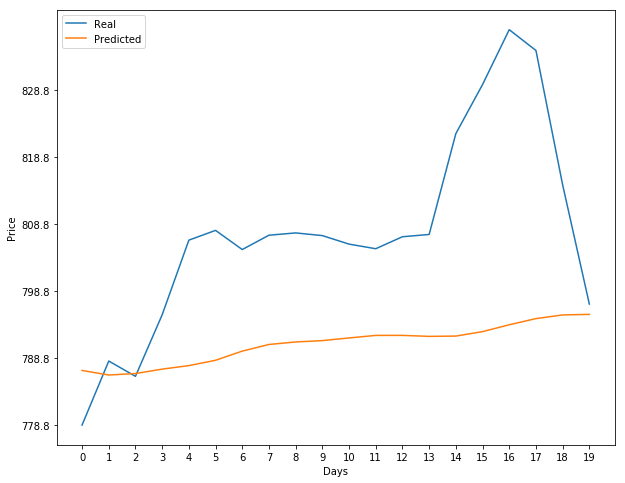

In [34]:
plt.plot(test_set_real,label="Real")
plt.plot(test_set_pred,label="Predicted")
plt.legend()
plt.xticks(np.arange(0,len(test_set_pred)))
plt.xlabel("Days")
plt.yticks(np.arange(min(min(test_set_pred),min(test_set_real)),max(max(test_set_pred),max(test_set_real)),10))
plt.ylabel("Price")
plt.title("")
plt.show()